In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from textwrap import wrap
from scipy.stats import gmean
import sarchl

rc('text', usetex=False)
sns.set_context('paper', font_scale=2.0)
sns.set_style('whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
dcu_data = pd.read_csv('./DCUscalar.csv',index_col=0)
# print(dcu_data.columns)
# dcu_data.columns = ['Benchmark','DCU+L1','DCU+L1+freq']
dcu_data['512'] = dcu_data['512']/dcu_data['32']
dcu_data['256'] = dcu_data['256']/dcu_data['32']
dcu_data['128'] = dcu_data['128']/dcu_data['32']
dcu_data['64'] = dcu_data['64']/dcu_data['32']
dcu_data['32'] = dcu_data['32']/dcu_data['32']


dcu_data = dcu_data.melt(id_vars=['Benchmark'],value_vars=['32','64','128','256','512'])
dcu_data.columns=['Benchmark','NumSA','Normalized\nExecution Time']

In [16]:
dcu_data

Benchmark NumSA  Normalized\nExecution Time
0       ATAX    32                    1.000000
1       BICG    32                    1.000000
2         BS    32                    1.000000
3        FIR    32                    1.000000
4        FLW    32                    1.000000
5        FWT    32                    1.000000
6         KM    32                    1.000000
7         MT    32                    1.000000
8         PR    32                    1.000000
9       ReLU    32                    1.000000
10      SPMV    32                    1.000000
11      ATAX    64                    0.998373
12      BICG    64                    0.980612
13        BS    64                    1.025243
14       FIR    64                    0.513851
15       FLW    64                    1.109945
16       FWT    64                    0.623418
17        KM    64                    0.613004
18        MT    64                    0.608258
19        PR    64                    1.000082
20      ReLU    64                    0.999999
21      SPMV    64                    0.647753
22      ATAX   128                    1.033457
23      BICG   128                    0.988167
24        BS   128                    1.078513
25       FIR   128                    0.433209
26       FLW   128                    1.163057
27       FWT   128                    0.635926
28        KM   128                    0.618696
29        MT   128                    0.548973
30        PR   128                    1.000143
31      ReLU   128                    1.000000
32      SPMV   128                    0.640982
33      ATAX   256                    1.046979
34      BICG   256                    0.924232
35        BS   256                    1.121752
36       FIR   256                    0.416858
37       FLW   256                    1.104208
38       FWT   256                    0.750307
39        KM   256                    0.616048
40        MT   256                    0.545627
41        PR   256                    1.000228
42      ReLU   256                    0.999999
43      SPMV   256                    0.629929
44      ATAX   512                    1.021731
45      BICG   512                    0.978327
46        BS   512                    1.154811
47       FIR   512                    0.416803
48       FLW   512                    1.125423
49       FWT   512                    0.790332
50        KM   512                    0.585786
51        MT   512                    0.578494
52        PR   512                    1.000164
53      ReLU   512                    0.999999
54      SPMV   512                    0.627194

In [17]:
palt = sarchl.sequential_palette(5)
palt

['#02090a', '#164e5d', '#2a93af', '#64c2da', '#b7e2ee']

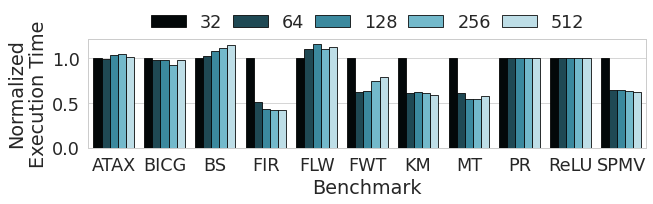

In [20]:
fig, ax = plt.subplots(figsize=(10, 2))
sns.barplot(data=dcu_data, 
            x='Benchmark', hue='NumSA', y='Normalized\nExecution Time', 
            palette=palt, ec='k',
            ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, 
          frameon=False,
          fancybox=None, 
          columnspacing=0.6,
          facecolor=None, edgecolor=None, 
          bbox_to_anchor=(0.5, 1.15), loc=10, ncol=5)
# ax.set_ylim(0.9, 1.70)
# ax.set_yticks([1.0, 1.3, 1.6])
plt.savefig('DCUscalar.pdf', bbox_inches='tight')
plt.show()


In [19]:
times=dcu_data.loc[dcu_data['GPU']=='DCU+L1+freq']['Normalized\nExecution Time']
gmean(times)

KeyError: 'GPU'